# 4. Multiday simulations and spillover feature

pySIMDEUM allows the user to run a simulation for multiple days through toggling the `duration` argument for simulation. As you would expect, by default, `consumption` and `discharge` events can flow into the next day.

However, if a `consumption` or `discharge` event is simulated that extends past the end of the simulation time period, the rest of the event is lost. This is true whether it is a single or multi-day simulation. When enabled, the `spillover` feature allows for these events to be looped back into the start of the simulation period so that your simulation represents a complete system and whatever water is consumed is then discharged.

## Multi-day simulations

In [1]:
import pysimdeum
import matplotlib.pyplot as plt

Initialise a two-person household. By default, a 1-day event is simulated. You can control the number of days by inputting a `str` into the `duration` argument.

In [2]:
# Build a house (two-person household)
house = pysimdeum.built_house(house_type='family', duration ='1 day')

Some enduses such as the `WashingMachine` and `Dishwasher` are more likely to be used overnight so are more likely to experience cut off when passing the end of the simulation time. The plot below shows such a case for a `WashingMachine` that has two usage events, once at ~8-10pm, and another starting close to midnight, but the final cycles of that usage event are cut off by the end of the simulation time.

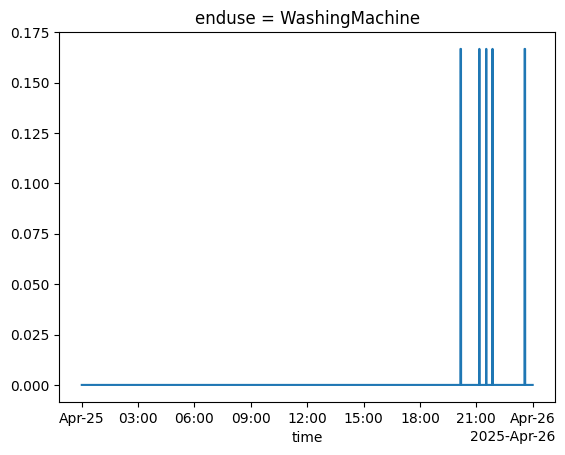

In [3]:
house.consumption.sum(["user","patterns","flowtypes"]).sel(enduse="WashingMachine").plot()

Notice that in the case below, when resimulating over a 2 day period, we have an event in the middle of the simulation crossing over midnight of the first day into the start of the second day. pySIMDEUM handles this by default and just allows it to run into the second day.

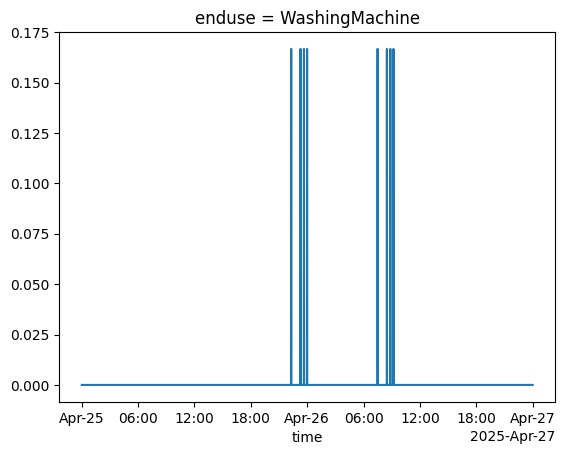

In [150]:
consumption, discharge = house.simulate(num_patterns=1, duration='2 day', simulate_discharge=True)
consumption.sum(["user","patterns","flowtypes"]).sel(enduse="WashingMachine").plot()

## Spillover feature

The `spillover` feature specifically targets events that run past the end time of a simulation period. When toggled on `spillover=True`, the remainder of the affected `consumption` and/or `discharge` event (passing midnight on the final day of simulation) will be wrapped back into the start of the simulation period (Day 1 00:00:00).

In the plot below, you can see the consumption event of the `WashingMachine` extending past the end of the simulation time and having its final three cycles looped back into the start of the simulation. The behaviour is also implemented for the `discharge` event. Note how the event passing midnight at the end of the first day is unaffected.

A usage event for  WashingMachine  use has spilled over to the next day. Adjusting spillover times...
Spillover consumption adjustment complete.
A usage event for  WashingMachine  use has spilled over to the next day. Adjusting spillover times...
Spillover consumption adjustment complete.


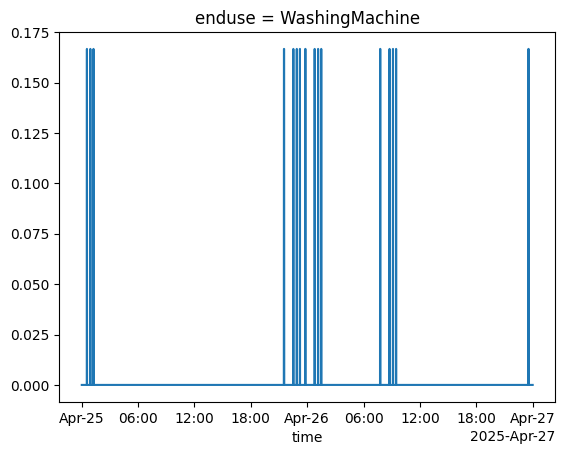

In [195]:
consumption, discharge = house.simulate(num_patterns=1, duration='2 day', simulate_discharge=True, spillover=True)
consumption.sum(["user","patterns","flowtypes"]).sel(enduse="WashingMachine").plot()

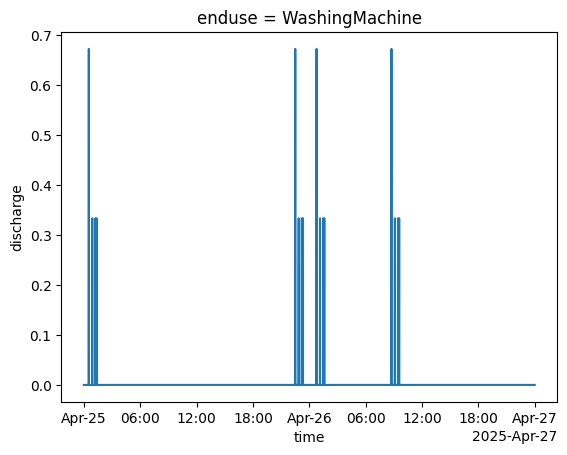

In [196]:
discharge.discharge.sum(["user","patterns","dischargetypes"]).sel(enduse="WashingMachine").plot()